In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating project at `~/Documents/eth_courses/notebooks/control/invariance`


In [2]:

# Load Dependencies
using Plots
using LazySets
using LinearAlgebra: I
using InvariantSets, Polyhedra, CDDLib
using MathematicalSystems
using ControlSystems

 # Recitation problem

## Control invariant set

Convergence at iteration : 64


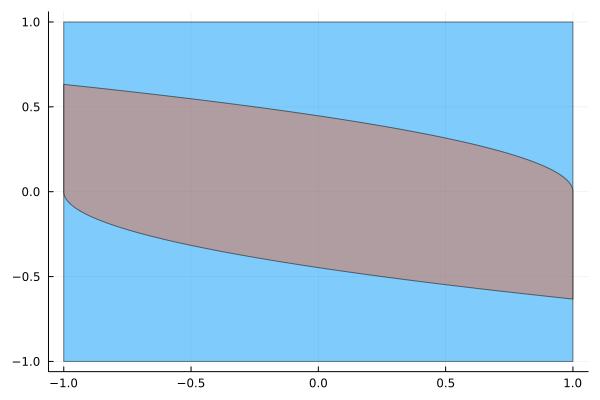

In [3]:
let
Ts = 0.1

A = [1.0 Ts; 0.0 1.0];
B = Matrix([Ts^2/2 Ts]');

# Half-space representation
X = Hyperrectangle(low=[-1.0, -1.0], high=[1.0, 1.0])
U = Hyperrectangle(low=[-0.1], high=[0.1])

system = @system x⁺ = A*x + B*u x∈X u∈U
InvSet = maximum_control_invariant_set(system)

plot(X) # feasible region
plot!(InvSet)

end

## Approximation using LQR controller

Convergence at iteration : 64
Convergence at iteration : 64


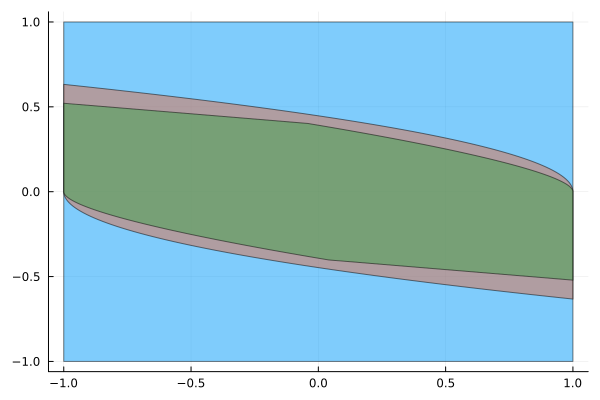

In [4]:
 let
Ts = 0.1

A = [1.0 Ts; 0.0 1.0];
B = Matrix([Ts^2/2 Ts]');
C = [1 1]

Q = I(2)
R = 1000
K = lqr(Discrete,A,B,Q,R)

# Half-space representation
X = Hyperrectangle(low=[-1.0, -1.0], high=[1.0, 1.0])
U = Hyperrectangle(low=[-0.1], high=[0.1])

autSys = @system x⁺ = A*x  x∈X
ctrlSys = @system x⁺ = A*x + B*u x∈X u∈U
    
MIL = maximum_invariant_set(ctrlSys, K)
MCI = maximum_control_invariant_set(ctrlSys)
    
plot(X)  # feasible region

    
plot!(MCI) 
plot!(MIL) #with specific controller

end